# Problem 5.1: Solar Power - data reader

The following is a small program to read the data file "data_SolarPower.txt", which contains three columns: Year, cumulative solar power capacity (in MW), and Price (USD/Watt installed)

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [1]:
# Read the data and print it to check it:
import numpy as np
import matplotlib.pyplot as plt

from ExternalFunctions import Chi2Regression

from scipy import stats
from iminuit import Minuit                             # The actual fitting tool, better than scipy's

In [2]:
year, capacity, price = np.loadtxt("data_SolarPower.txt", skiprows=2, delimiter="\t", unpack=True)

print("Number of entries: ", len(year))
for i in range(len(year)) : 
    print(f"  {int(year[i]):4d}:  {capacity[i]:10.2f}   {price[i]:7.3f}")

Number of entries:  44
  1976:        0.30   106.100
  1977:        0.85    80.630
  1978:        1.80    56.230
  1979:        3.30    47.740
  1980:        6.50    35.010
  1981:       12.50    26.520
  1982:       20.00    22.280
  1983:       43.00    19.090
  1984:       67.00    16.970
  1985:       90.00    14.850
  1986:      120.00    11.140
  1987:      150.00     8.486
  1988:      175.00     7.532
  1989:      220.00     8.168
  1990:      270.00     8.805
  1991:      330.00     7.956
  1992:      400.00     7.213
  1993:      450.00     7.107
  1994:      500.00     6.365
  1995:      575.00     5.834
  1996:      700.00     6.046
  1997:      800.00     6.365
  1998:      975.00     5.728
  1999:     1250.00     5.092
  2000:     1500.00     4.879
  2001:     1750.00     4.773
  2002:     2300.00     4.031
  2003:     3000.00     3.978
  2004:     4300.00     4.137
  2005:     6000.00     4.243
  2006:     8500.00     4.455
  2007:    10300.00     4.137
  2008:    20000.

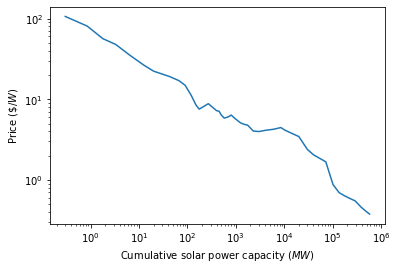

In [3]:
fig1, ax1 = plt.subplots()
ax1.plot(capacity, price)

ax1.set_xlabel(r'Cumulative solar power capacity ($MW$)')
ax1.set_ylabel(r'Price ($\$/W$)')

ax1.set_xscale('log')
ax1.set_yscale('log')

plt.show()

In [4]:
def power_law(x,a,b):
    return a*x**(-b)

In [5]:
def do_a_chi2_fit(x_data, y_data, sigma_y_data, f, init_guess):
    """Does a chi2 fit, plots results and returns the minuit output
    init_guess needs to have the initial fit parameters in a list format (e.g. [a,b,c])"""
    chi2 = Chi2Regression(f, x_data, y_data, sigma_y_data)
    chi2.errordef = 1
    minuit_chi2 = Minuit(chi2, *init_guess) #   
    display(minuit_chi2.migrad())          # Perform the actual fit

    # Get number of degrees-of-freedom (Ndof):
    Ndof_value = len(x_data) - minuit_chi2.nfit

    chi2_value = minuit_chi2.fval
    p_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
    print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {p_value:5.10f}")

    return minuit_chi2, Ndof_value, p_value

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 86.6                       │              Nfcn = 146              │
│ EDM = 8.77e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   72.9    │    3.4    │            │            │         │         │       │
│ 1 │ b    │   0.381   │   0.006   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │     11.2   0.0164 │
│ b │   0.0164 3.23e-05 │
└───┴───────────────────┘

Chi2 value: 86.6   Ndof = 42    Prob(Chi2,Ndof) = 0.0000622638


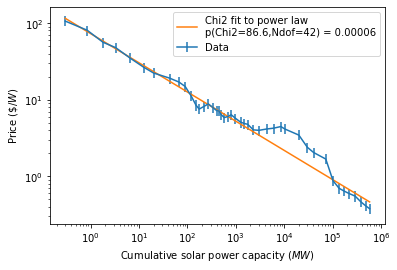

In [6]:
sigma_price = price*0.15

# Do a chi2 fit
minuit_chi2_pl, Ndof_value, p_value = do_a_chi2_fit(capacity, price, sigma_price, power_law, [1,1])

# Plot
x_axis = np.linspace(np.min(capacity), np.max(capacity), 1000)
y_axis = power_law(x_axis,*minuit_chi2_pl.values)

fig2, ax2 = plt.subplots()
ax2.errorbar(capacity, price, yerr=sigma_price, label='Data')
ax2.plot(x_axis, y_axis,label=f'Chi2 fit to power law\np(Chi2={minuit_chi2_pl.fval:.1f},Ndof={Ndof_value:d}) = {p_value:.5f}')

ax2.set_xlabel(r'Cumulative solar power capacity ($MW$)')
ax2.set_ylabel(r'Price ($\$/W$)')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.legend()

plt.show()

In [7]:
def z_score(val, mu, sigma):
    """The Z-score describes how many sigma away from the mean a value is."""
    return (val-mu)/sigma

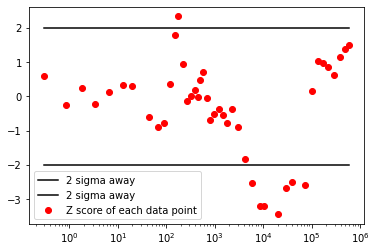

In [8]:
theo_val = power_law(capacity,*minuit_chi2_pl.values)
z_values = z_score(theo_val, price, sigma_price)

fig_z1, ax_z1 = plt.subplots()
ax_z1.scatter(capacity, z_values, label='Z score of each data point',color='red')
ax_z1.plot([capacity[0],capacity[-1]],[2,2],label='2 sigma away',color='black')
ax_z1.plot([capacity[0],capacity[-1]],[-2,-2],label='2 sigma away',color='black')

ax_z1.set_xscale('log')
ax_z1.legend()

plt.show()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 86.6                       │              Nfcn = 35               │
│ EDM = 2.42e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   72.9    │    3.4    │            │            │         │         │       │
│ 1 │ b    │   0.381   │   0.006   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │     11.2   0.0164 │
│ b │   0.0164 3.23e-05 │
└───┴───────────────────┘

Chi2 value: 86.6   Ndof = 42    Prob(Chi2,Ndof) = 0.0000622653


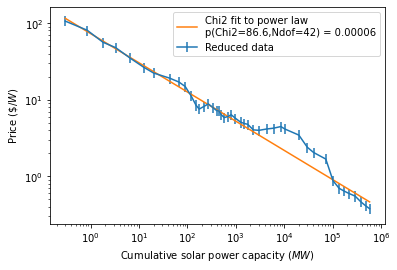

Data points that can be discarded according to Chauvenet's criterion:
 [ 4300.  6000.  8500. 10300. 20000. 30000. 40279. 72034.]
Probabilities of those data points:
 [5.73429081e-03 2.65915055e-05 3.34487092e-10 3.57145404e-10
 6.18034722e-13 4.15453332e-06 3.22398885e-05 1.05763807e-05]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.32                      │              Nfcn = 36               │
│ EDM = 5.23e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   73.6    │    3.5    │            │            │         │         │       │
│ 1 │ b    │   0.390   │   0.006   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │     12.2   0.0182 │
│ b │   0.0182 3.81e-05 │
└───┴───────────────────┘

Chi2 value: 18.3   Ndof = 34    Prob(Chi2,Ndof) = 0.9870459177


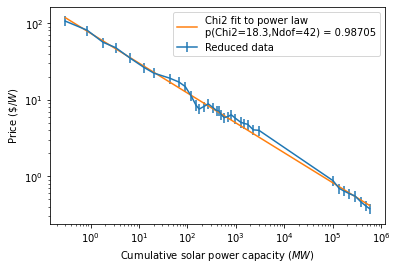

Data points that can be discarded according to Chauvenet's criterion:
 []
Probabilities of those data points:
 []


In [9]:
verbose = True

x_data_reduced = np.copy(capacity)
y_data_reduced = np.copy(price)
sigma_y_reduced = 0.15*y_data_reduced

previous_x_data, previous_y_data, previous_y_sigma = None, None, None

while not np.array_equal(x_data_reduced, previous_x_data):
    previous_x_data = np.copy(x_data_reduced)
    previous_y_data = np.copy(y_data_reduced)
    previous_sigma_y = np.copy(sigma_y_reduced)
    
    # Do a fit, calculate p-values, create mask according to chauevenet criterion
    minuit_chi2, Ndof_value_pl, p_value_pl = do_a_chi2_fit(previous_x_data, previous_y_data, previous_sigma_y, power_law, [73,0.38])
    
    x_axis = np.linspace(np.min(previous_x_data), np.max(previous_x_data), 1000)
    y_axis = power_law(x_axis,*minuit_chi2.values)

    fig2, ax2 = plt.subplots()
    ax2.errorbar(previous_x_data, previous_y_data, yerr=previous_sigma_y, label='Reduced data')
    ax2.plot(x_axis, y_axis,label=f'Chi2 fit to power law\np(Chi2={minuit_chi2.fval:.1f},Ndof={Ndof_value:d}) = {p_value_pl:.5f}')

    ax2.set_xlabel(r'Cumulative solar power capacity ($MW$)')
    ax2.set_ylabel(r'Price ($\$/W$)')

    ax2.set_xscale('log')
    ax2.set_yscale('log')

    ax2.legend()

    plt.show()
    
    # Do the chauvenet criterion thing
    theo_val = power_law(previous_x_data,*minuit_chi2.values)
    sigma_theo_val = 0.15*theo_val
    p_values = stats.norm.sf(previous_y_data,loc=theo_val,scale=sigma_theo_val)
    
    chauvenet_mask = p_values*len(previous_x_data) > 0.5 # This is the chauvenet criterion
    
    x_data_reduced = previous_x_data[chauvenet_mask]
    y_data_reduced = previous_y_data[chauvenet_mask]
    sigma_y_reduced = previous_sigma_y[chauvenet_mask]

    if verbose:
        print('Data points that can be discarded according to Chauvenet\'s criterion:\n',previous_x_data[~chauvenet_mask]) # ~ inverts the mask
        print('Probabilities of those data points:\n',p_values[~chauvenet_mask])
        #print(year[~chauvenet_mask])

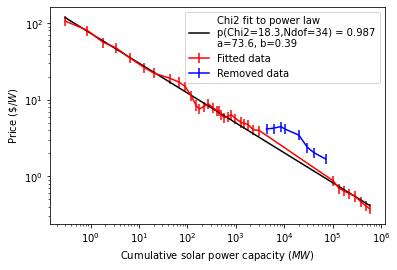

In [10]:
# Making a fancy plot to hand in
reduce_mask = np.in1d(capacity, x_data_reduced)

capacity_reduced = capacity[reduce_mask]
price_reduced = price[reduce_mask]
sigma_price_reduced = sigma_price[reduce_mask]
year_reduced = year[reduce_mask]

x_axis = np.linspace(np.min(capacity_reduced), np.max(capacity_reduced), 1000)
y_axis = power_law(x_axis,*minuit_chi2.values)

fig2, ax2 = plt.subplots()
ax2.errorbar(capacity_reduced, price_reduced, yerr=sigma_price_reduced, label='Fitted data',color='red')
ax2.errorbar(capacity[~reduce_mask], price[~reduce_mask], yerr=sigma_price[~reduce_mask], label='Removed data',color='blue')

label_string = f'Chi2 fit to power law\n'+ \
            f'p(Chi2={minuit_chi2.fval:.1f},Ndof={Ndof_value_pl:d}) = {p_value_pl:.3f}\n'+ \
            f'a={minuit_chi2.values[0]:.3}, b={minuit_chi2.values[1]:.3}'

ax2.plot(x_axis, y_axis,label=label_string,color='black')

ax2.set_xlabel(r'Cumulative solar power capacity ($MW$)')
ax2.set_ylabel(r'Price ($\$/W$)')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.legend()

plt.savefig('Problem_5.1_power_law.png',dpi=600)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.103e+04                  │              Nfcn = 121              │
│ EDM = 6.96e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 42.13e-3  │  0.22e-3  │            │            │         │         │       │
│ 1 │ b    │1.964070e3 │0.000011e3 │            │            │         │         │       │
│ 2 │ c    │ 301.46e-3 │  0.16e-3  │            │            │         │         │       │
│ 3 │ d    │   -0.4    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────┐
│   │         a         b         c         d │
├───┼─────────────────────────────────────────┤
│ a │  4.79e-08 -2.44e-06 -3.57e-08 -3.74e-06 │
│ b │ -2.44e-06  0.000128  1.84e-06  0.000193 │
│ c │ -3.57e-08  1.84e-06  2.68e-08  2.76e-06 │
│ d │ -3.74e-06  0.000193  2.76e-06     0.174 │
└───┴─────────────────────────────────────────┘

Chi2 value: 51031.3   Ndof = 40    Prob(Chi2,Ndof) = 0.0000000000


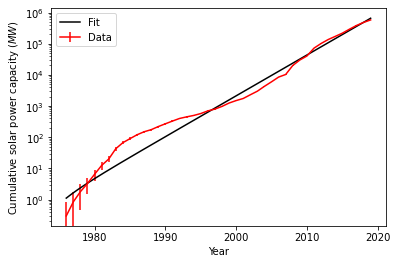

In [34]:
# The data looks exponential to me
def exponential(x, a,b,c,d):
    return a*np.exp((x-b)*c) + d

def stupid_fit_function(x, a,b,c,d,e,f,g):
    return a * np.exp((x-b)*c) * np.sin((x-f)*(2*np.pi)/g) + d

# Do a chi2 fit
chi2_exp = Chi2Regression(exponential, year, capacity, np.sqrt(capacity)) # No uncertainty known on capacity -> Pearson chi2
#chi2_exp = Chi2Regression(exponential, year_reduced, capacity_reduced, np.sqrt(capacity_reduced))
#chi2_exp = Chi2Regression(stupid_fit_function, year, capacity, 0.2*capacity)#np.sqrt(capacity))
chi2_exp.errordef = 1
minuit_chi2_exp = Minuit(chi2_exp, a=0.05, b=2000, c=0.3, d=1)
#minuit_chi2_exp = Minuit(chi2_exp, a=0.05, b=2000, c=0.3, d=1, e=100, f=0, g=25) #   
display(minuit_chi2_exp.migrad())          # Perform the actual fit


# Get number of degrees-of-freedom (Ndof):
Ndof_value = len(price) - minuit_chi2_exp.nfit
#Ndof_value = len(price_reduced) - minuit_chi2_exp.nfit

chi2_exp_value = minuit_chi2_exp.fval
p_value = stats.chi2.sf(chi2_exp_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_exp_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {p_value:5.10f}")


x_axis = np.linspace(np.min(year),np.max(year),1000)
#x_axis = np.linspace(np.min(year_reduced),np.max(year_reduced),1000)
fig3, ax3 = plt.subplots()
ax3.errorbar(year, capacity, yerr=np.sqrt(capacity), label='Data',color='red')
#ax3.errorbar(year, capacity, yerr=0.2*capacity, label='Data',color='red')
#ax3.scatter(year_reduced, capacity_reduced, label='Data',color='red')
ax3.plot(x_axis,exponential(x_axis,*minuit_chi2_exp.values),label='Fit',color='black')
#ax3.plot(x_axis,stupid_fit_function(x_axis,*minuit_chi2_exp.values),label='Fit',color='black')

ax3.set_xlabel(r'Year')
ax3.set_ylabel(r'Cumulative solar power capacity ($MW$)')

ax3.set_yscale('log')

ax3.legend()
plt.show()

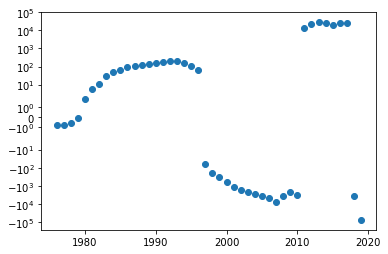

In [40]:
# Residuals
plt.scatter(year, capacity-exponential(year,*minuit_chi2_exp.values))
plt.yscale('symlog')